# Домашнее задание 2
## На курсе Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

фиксация сида для того, чтобы можно было получить те же самые данные и в другом прогоне.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


## **Простейший EDA и обработка признаков (4.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (1.65 балла)**


Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [3]:
# 1
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
# 2
print(df_test.head())
print(df_test.tail())

                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

In [5]:
# 3 
print('df_train', df_train.columns[df_train.isnull().any()])
print('df_test', df_test.columns[df_test.isnull().any()])

df_train Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')
df_test Index(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype='object')


In [6]:
#4 Да.
df_train[df_train.duplicated(keep=False)].sort_values('name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3291,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
361,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


Мы обнаружили пропуски. Давайте избавимся от них.
<p id="task_1_fill_nulls"></p>

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.


как не сложно видеть на этом этапе можно восполнить медианой только seats

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [8]:
df_test['seats']  = df_test['seats'].transform(lambda x: x.fillna(x.median()))
df_train['seats'] = df_train['seats'].transform(lambda x: x.fillna(x.median()))
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6999 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


### **Задание 2 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [9]:
# 1, 2
# 1 да, 1159 объектов
df_train[df_train.duplicated(
    subset=[col for col in df_train.columns if col != "selling_price"],
    keep="first"
)].sort_values('name')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [10]:
df_train_cleaned = df_train.drop_duplicates( # 3
    subset=[col for col in df_train.columns if col != "selling_price"],
    keep="first"
)
df_train = df_train_cleaned.reset_index(drop=True) # 4
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [11]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [12]:
get_col_split = lambda path: df_train[path].str.split(' ').str[0]

# тут используется coerce, чтобы ошибки падали в none,
# тк есть данные где не однозначно что должно быть 
# например значение с max_power = 'bhp'
df_train['mileage']   = pd.to_numeric(get_col_split('mileage'), 'coerce') 
df_train['engine']    = pd.to_numeric(get_col_split('engine'), 'coerce')
df_train['max_power'] = pd.to_numeric(get_col_split('max_power'), 'coerce')
df_train = df_train.drop(columns=['torque'])

In [13]:
get_col_split = lambda path: df_test[path].str.split(' ').str[0]

df_test['mileage']   = pd.to_numeric(get_col_split('mileage'), 'coerce')
df_test['engine']    = pd.to_numeric(get_col_split('engine'), 'coerce')
df_test['max_power'] = pd.to_numeric(get_col_split('max_power'), 'coerce')
df_test = df_test.drop(columns=['torque'])

### **Задание 4 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [14]:
int_cols = ['seats', 'engine']
df_train[int_cols] = df_train[int_cols].astype('Int64')
df_test[int_cols] = df_test[int_cols].astype('Int64') 
# использование Int связано с тем чтобы можно было без ошибок обработать None/null

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [15]:
# include object покажет категориальные, а обычный вызов числовые
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [16]:
df_train.describe() 

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5654.000000,5656.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1435.418111,88.103070,5.426712
std,4.095622,5.354320e+05,6.007114e+04,4.051002,492.453262,32.131943,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [17]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [18]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000,981.000000,981.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1458.882773,91.015627,5.403000
std,4.012149,7.585539e+05,48486.218662,3.989872,526.228560,35.207383,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.000000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.000000,83.100000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,9.000000


In [19]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [20]:
object_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
count_cols = [col for col in df_train.columns if col not in object_cols]

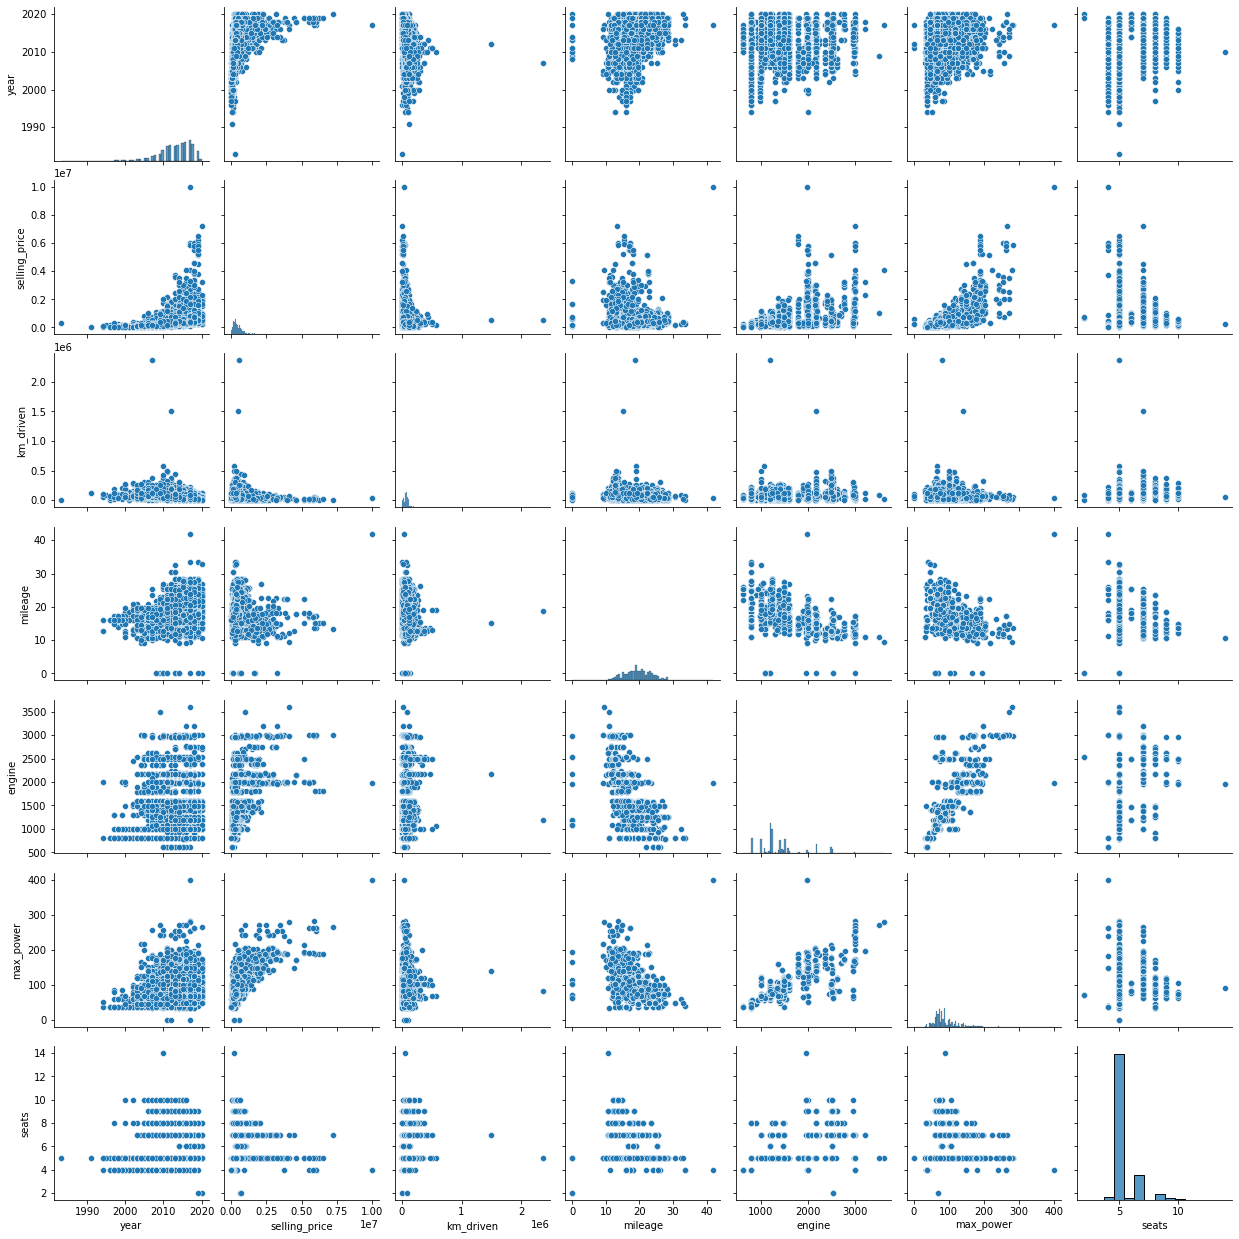

In [21]:
sns.pairplot(df_train[count_cols])

- Можно ли предположить на основе распределений связь признаков с целевой переменной?

Да, почти во всех переменных мы видим некие паттерны зависимости распределения переменных от цены машины. Например, чем мощнее максимум двигателя, тем дороже машина, чем новее машина - тем она дороже
- Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

При этом мы видим, что в выборке в целом больше всего недорогих машин, и на их полюсе аккумулируется большое число наблюдений, из-за чего появление статистических корреляций предположить затруднительно. 
Тем не менее, самые заметные паттерны у максимума мощности двигателя и года выпуска, поэтому гипотезы будут следующие:
  - Чем больше максимум мощности двигателя, тем дороже автомобиль
  - Чем ближе год выпуска автомобиля к текущей дате, тем дороже машина

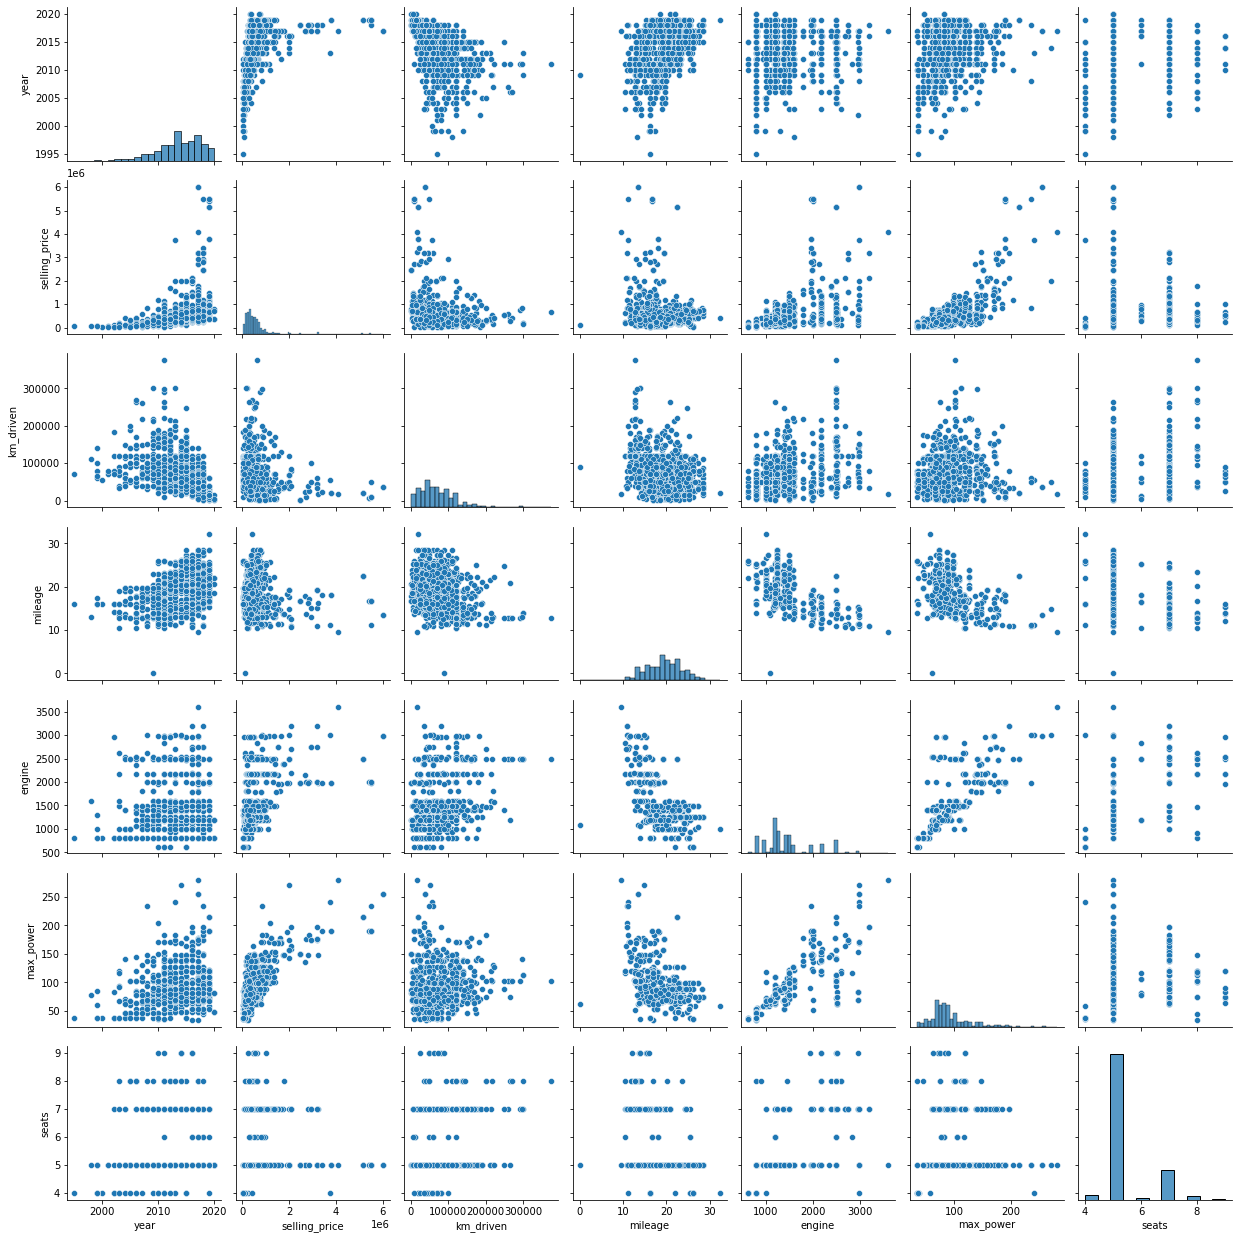

In [22]:
sns.pairplot(df_test[count_cols])

- Похожими ли оказались совокупности при разделении на трейн и тест?

Да, совокупности оказались похожи, все паттерны распределений повторяются

### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [23]:
df_train.corr(method='pearson')

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.363360,-0.016790,0.157376,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105939,0.445615,0.695593,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.183538,0.235914,0.026676,0.192328
mileage,0.363360,-0.105939,-0.183538,1.000000,-0.574404,-0.374699,-0.452687
engine,-0.016790,0.445615,0.235914,-0.574404,1.000000,0.681640,0.650345
max_power,0.157376,0.695593,0.026676,-0.374699,0.681640,1.000000,0.242541
seats,0.041178,0.149953,0.192328,-0.452687,0.650345,0.242541,1.000000


<AxesSubplot:>

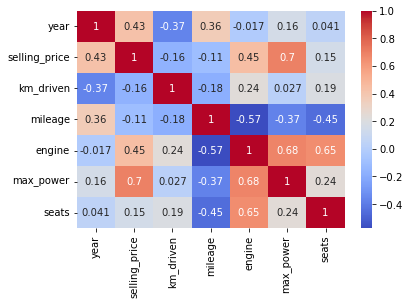

In [24]:
sns.heatmap(df_train.corr(method='pearson'), annot=True, cmap='coolwarm')

Результаты моих гипотез: 
- Связь между максимальной мощностью и ценой действительно есть: чем мощнее, тем дороже (гипотеза не отклоняется)
- Связь между годом выпуска и ценой автомобиля не наблюдается (гипотеза не принимается)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) - год выпуска и мощность двигателя (0.002819)
    - год выпуска и количество мест (0.041178)
2) - цена и max_power, (0.6928),
    - engine и max_power, где (0.6811),
    - engine и seats, где (0.6522). 
3) year и km_driven (-0.3689).
    говорит о том чем меньше год, тем больше км проехала, но связь небольшая, по модулю меньше 0.5 так что нет.
    

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [25]:
target = 'selling_price'
count_non_target = [col for col in count_cols if col != target]

def create_X_y(df, features, target):
    return  df[features], df[target]
    

In [26]:
X_train, y_train = create_X_y(df_train, count_non_target, target)

In [27]:
assert X_train.shape == (5840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [28]:
X_test, y_test = create_X_y(df_test, count_non_target, target)

In [29]:
assert X_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [30]:
# чтобы можно было реализовать регрессии избавимся от null
df_train_dropped = df_train.dropna()
df_test_dropped  = df_test.dropna()

X_train_dr, y_train_dr = create_X_y(df_train_dropped, count_non_target, target)
X_test_dr, y_test_dr = create_X_y(df_test_dropped, count_non_target, target)


In [31]:
from sklearn.metrics import r2_score, mean_squared_error as MSE

def print_stats(y_train_pred, y_test_pred, title=""):
    r2_train = r2_score(y_train_dr, y_train_pred)
    mse_train = MSE(y_train_dr, y_train_pred)

    r2_test = r2_score(y_test_dr, y_test_pred)
    mse_test = MSE(y_test_dr, y_test_pred)

    print(f"Train {title} R^2: {r2_train:.4f}, Train MSE: {mse_train:.4f}")
    print(f"Test  {title} R^2: {r2_test:.4f}, Test  MSE: {mse_test:.4f}")

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_dr, y_train_dr)

y_train_pred = model.predict(X_train_dr)
y_test_pred = model.predict(X_test_dr)
print_stats(y_train_pred, y_test_pred, 'Lin')


Train Lin R^2: 0.5922, Train MSE: 118710398009.7073
Test  Lin R^2: 0.5924, Test  MSE: 237255942487.7807


Выводы на основе метрик качества:
- $R^2$ больше 0,5, что означает предсказания лучше рандомных, тем не менее, т.к. он меньше 0,7 - предсказание ближе к рандомизированному, чем к корректному
- $MSE$ принимает миллиардные значения, что говорит о больших ошибках прогноза

### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [33]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_dr)

X_test_scaled = scaler.transform(X_test_dr)

model = LinearRegression()
model.fit(X_train_scaled, y_train_dr)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print_stats(y_train_pred, y_test_pred, 'Lin scaled')

Train Lin scaled R^2: 0.5922, Train MSE: 118710398009.7072
Test  Lin scaled R^2: 0.5924, Test  MSE: 237255942487.7698


### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [34]:
coefficients = model.coef_

feature_importance = {col: coef for col, coef in zip(X_train.columns, coefficients)}

sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

most_important_feature = sorted_features[0]
print(f"Самый важный признак: {most_important_feature[0]} с коэффициентом {most_important_feature[1]:.4f}") 
# что очевидно, тк корреляция с ним была наибольшая


Самый важный признак: max_power с коэффициентом 327220.8643


### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [35]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train_dr)

y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)


print_stats(y_train_pred, y_test_pred, 'lasso')

Train lasso R^2: 0.5922, Train MSE: 118710398019.8714
Test  lasso R^2: 0.5924, Test  MSE: 237256611525.5375


Как видно значения метрик толком не поменялись, что говорит о том что можно сделать лучше!

In [36]:
lasso_coefficients = lasso_model.coef_
feature_importance = {col: coef for col, coef in zip(X_train.columns, lasso_coefficients)}

zero_coefficients = [feature for feature, coef in feature_importance.items() if coef == 0]
print(f"Зануленные признаки: {zero_coefficients}")
print(f"Количество зануленных признаков: {len(zero_coefficients)}")

Зануленные признаки: []
Количество зануленных признаков: 0


как мы видели выше корреляция между параметрами низкая и они не зануляются

### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [37]:
from sklearn.model_selection import GridSearchCV

cv_cnt = 10
alpha_cnt = 50

param_grid = {'alpha': np.logspace(-4,4,alpha_cnt)}
lasso = Lasso()
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=cv_cnt, verbose=1, scoring='r2')

grid_search.fit(X_train_scaled, y_train_dr)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

zeroed_weights = np.sum(best_model.coef_ == 0)

print(f"Лучший коэффициент регуляризации (alpha): {best_alpha}")
print(f"{best_score=}")

num_models = alpha_cnt * cv_cnt 
# количество будет число фолдов * число параметров для просмотра (logspace)
# это так же видно из логов при verbose
print(f"GridSearchCV обучил {num_models} моделей.")


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Лучший коэффициент регуляризации (alpha): 10000.0
best_score=0.5726527999532618
GridSearchCV обучил 500 моделей.


In [38]:
coefficients = best_model.coef_
feature_importance = {col: coef for col, coef in zip(X_train.columns, coefficients)}

zero_coefficients = [feature for feature, coef in feature_importance.items() if coef == 0]
print(f"Зануленные признаки: {zero_coefficients}")
print(f"Количество зануленных признаков: {len(zero_coefficients)}")

Зануленные признаки: ['seats']
Количество зануленных признаков: 1


In [39]:
best_model.fit(X_train_scaled, y_train_dr)
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

print_stats(y_train_pred, y_test_pred, 'lasso cv')

Train lasso cv R^2: 0.5892, Train MSE: 119605567277.6938
Test  lasso cv R^2: 0.5799, Test  MSE: 244558668211.1590


Результат стал хуже изза использования фолдов, тк в нативном случае мы давали ему весь train а теперь только 9/10 частей от train 
Так же если поиграться с границами alpha, то можно увидеть как в зависимости от этого двигаются границы

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [40]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error

elastic_net = ElasticNet(max_iter=1_000)
param_grid = {
    'alpha': np.logspace(-4, 1, 20),      
    'l1_ratio': np.linspace(0.001, 1, 20)   
}


grid_search = GridSearchCV(estimator=elastic_net,
                           param_grid=param_grid,
                           cv=cv_cnt,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train_dr)



best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(f"Лучшие гиперпараметры: {best_params}")
# according this r2 is default 
# https://scikit-learn.org/stable/modules/grid_search.html#specifying-an-objective-metric
print(f"Лучший R^2: {best_score:.4f}")

total_models = len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10 
print(f"Количество обученных моделей: {total_models}")

Fitting 10 folds for each of 400 candidates, totalling 4000 fits
Лучшие гиперпараметры: {'alpha': 0.4832930238571752, 'l1_ratio': 0.6845263157894736}
Лучший R^2: 0.5771
Количество обученных моделей: 4000


In [41]:
best_model.fit(X_train_scaled, y_train_dr)
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

print_stats(y_train_pred, y_test_pred, 'elasticNet cv')

Train elasticNet cv R^2: 0.5843, Train MSE: 121025412715.2322
Test  elasticNet cv R^2: 0.5597, Test  MSE: 256320572353.6875


# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [42]:
df_train = df_train.drop(columns=['name'])
df_train_dropped = df_train_dropped.drop(columns=['name'])
df_train.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [43]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# используем так же df_train_dropped/df_test_dropped чтобы корректно модели создавались 
df_train_encoded = pd.get_dummies(df_train_dropped, columns=['seats', *object_cols[1:]], drop_first=True)
df_test_encoded = pd.get_dummies(df_test_dropped, columns=['seats', *object_cols[1:]], drop_first=True)

X_train_encoded = df_train_encoded[[col for col in df_train_encoded if col != target]]
y_train_encoded = df_train_encoded[target]

X_test_encoded = df_test_encoded[[col for col in df_test_encoded if col != target]]
y_test_encoded = df_test_encoded[target]


### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [44]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV

cv_cnt = 10
alpha_cnt = 50
param_grid = {'alpha': np.logspace(1, 4, alpha_cnt)}
ridge = Ridge(alpha=50_000)
# according this r2 is default 
# https://scikit-learn.org/stable/modules/grid_search.html#specifying-an-objective-metric
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=cv_cnt,
    verbose=1
)

grid_search.fit(X_train_encoded, y_train_encoded)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_



print(f"Лучший коэффициент регуляризации (alpha): {best_alpha}")
print(f"Лучший R^2: {best_score:.4f}")
num_models = alpha_cnt * cv_cnt # количество будет число фолдов * число параметров для просмотра alpha_cnt
print(f"GridSearchCV обучил {num_models} моделей.")



Fitting 10 folds for each of 50 candidates, totalling 500 fits
Лучший коэффициент регуляризации (alpha): 10.0
Лучший R^2: 0.6228
GridSearchCV обучил 500 моделей.


In [45]:
best_model.fit(X_train_scaled, y_train_dr)
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

print_stats(y_train_pred, y_test_pred, 'ridge cv')

Train ridge cv R^2: 0.5922, Train MSE: 118710914689.1791
Test  ridge cv R^2: 0.5921, Test  MSE: 237479101448.5006


Также видно, что результат ухудшается в сравнении с тренировкой на всей выборке, т.к. используем фолды и выборка меньше: видим, что при этом на тесте результат упал, что может быть связано с особенностями ridge

# **Часть 4 (7 баллов) | Классификация**



In [46]:
%pylab inline
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


c:\Users\annar\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [47]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
y_prob = log_reg.predict_proba(X_test)[:, 1]  

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"{roc_auc=:.4f}")
print(f"{pr_auc=:.4f}")


roc_auc=0.9259
pr_auc=0.9250


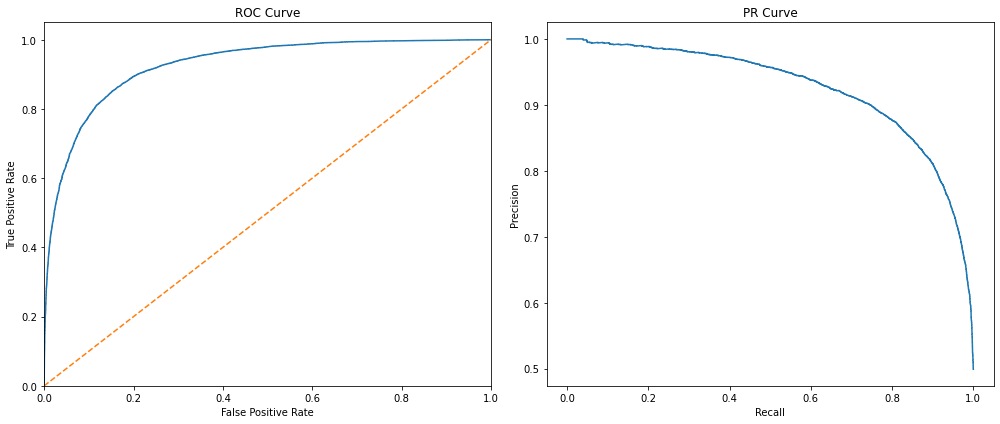

In [50]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.subplot(1, 2, 2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')

plt.tight_layout()
plt.show()

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [51]:
data = pd.read_csv('./data/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [53]:
model = LogisticRegression(max_iter=100, random_state=124, verbose=1) # too long
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\annar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


LogisticRegression(max_iter=1000, random_state=124, verbose=1)

In [55]:
from sklearn.metrics import classification_report


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train Metrics:")
base_metr_train = classification_report(y_train, y_train_pred, zero_division=0)
print(base_metr_train)

print("Test Metrics:")
base_metr_test = classification_report(y_test, y_test_pred, zero_division=0)
print(base_metr_test)

Train Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

Test Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043



### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [56]:
import time

cat_features = data.select_dtypes(include=['object']).columns
data_ = pd.get_dummies(data, columns=cat_features, drop_first=True)
print(f"Все названия колоное одинаковые:",
      len(data_.columns) == len(data.columns) and (data_.columns == data.columns).all())
print(f"Признаки не изменились, так что их так же {len(data.columns)}")
print()

num_features = data.select_dtypes(include=['number']).columns
scaler = StandardScaler()

st_time = time.time()
data_ = scaler.fit_transform(data[num_features])
total_time = time.time() - st_time
print(f"Все значения одинаковые после scaler: {(data_ == data).all().all()}")
print(f"Потребовалось на scale: {total_time:.2f}c")

X_train, X_test, y_train, y_test = train_test_split(data_, target, test_size=0.2, random_state=124)

Все названия колоное одинаковые: True
Признаки не изменились, так что их так же 57

Все значения одинаковые после scaler: False
Потребовалось на scale: 1.29c


In [57]:
start_time = time.time()
model = LogisticRegression(max_iter=1000, random_state=124)
model.fit(X_train, y_train)
train_time = time.time() - start_time

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Метрики
print("Train Metrics:")
metr_train = classification_report(y_train, y_train_pred, zero_division=0)
print(metr_train)

print("Test Metrics:")
metr_test = classification_report(y_test, y_test_pred, zero_division=0)
print(metr_test)

print(f"Время обучения модели: {train_time:.2f} секунд")

Train Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

Test Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

Время обучения модели: 2.34 секунд


In [58]:
print(f"Test equals: {base_metr_train == metr_train}")
print(f"Train equals: {base_metr_test == metr_test}")

Test equals: True
Train equals: True


## Answer
Данные не поменялись, скорее всего это связанно с тем, что скалирование для дасета уже было проведенно ранее

### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

In [61]:
from sklearn.linear_model import SGDClassifier


param_grid = {
    # 'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
    'alpha': np.logspace(-4,1,alpha_cnt),
    'random_state': [124],
}

sgd = SGDClassifier()
grid_search = GridSearchCV(
    estimator=sgd,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
start_time = time.time()
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time




Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [62]:
print("Best Parameters:", grid_search.best_params_)

# Лучший SGDClassifier
best_sgd = grid_search.best_estimator_

# Предсказания
y_train_pred = best_sgd.predict(X_train)
y_test_pred = best_sgd.predict(X_test)

# Метрики
print("Train Metrics:")
print(classification_report(y_train, y_train_pred, zero_division=0))

print("Test Metrics:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Время обучения
print("Время обучения GridSearchCV:", train_time, "секунд")

Best Parameters: {'alpha': 0.0001, 'random_state': 124}
Train Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    458796
           1       0.00      0.00      0.00     17373

    accuracy                           0.96    476169
   macro avg       0.48      0.50      0.49    476169
weighted avg       0.93      0.96      0.95    476169

Test Metrics:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114722
           1       0.00      0.00      0.00      4321

    accuracy                           0.96    119043
   macro avg       0.48      0.50      0.49    119043
weighted avg       0.93      0.96      0.95    119043

Время обучения GridSearchCV: 69.9507577419281 секунд


Метрики не поменялись на отображаемом виде, а значит они незначительнее, чем сотые доли каждой из метрик.